# Training Models

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of input features, plus a constant called the _bias term_.

_Linear Regression model prediction_

$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2  + ... + \theta_n x_n $

* $ y $ is the predicted value
* $ n $ is the number of features
* $ x_i $ is the $ i^{th} $ feature value
* $ \theta_j $ is the $ j^{th} $ model parameter

_Linear Regression model prediction (vectorized form)_

$ y = h_{\theta}(x) = \theta^T \cdot x $

* $ \theta $ is the model's parameter vector
* $ \theta^T $ is the transpose of $ \theta $
* $ x $ is the instance's feature vector
* $ h_{\theta} $ is the hypothesis function

To train Linear Regression model, we need to find the value of $ \theta $ that minimizes the RMSE.

_MSE cost function for a Linear Regression model_

$ MSE(X, h_{\theta}) = \frac {1} {m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})^2 $

### The Normal Equation

To find the value of $ \theta $ that minimizes the cost function, there is a closed-form solution – a mathematical equation that gives the result directly. This is called the Normal Equation.

_Normal Equation_ 

$ \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

* $ \theta $ is the value of $ \theta $ that minimizes the cost function
* $ y $ is the vector of target values containing $ y^{(1)} $ to $ y^{(m)} $

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

Text(0,0.5,'y')

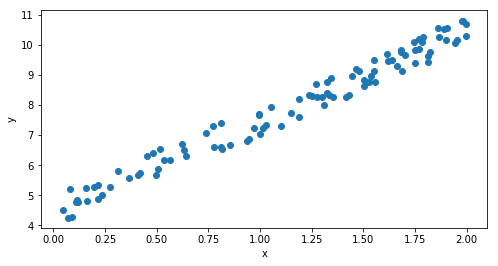

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

The `inv()` function from NumPy's Linear Algebra module computes the inverse of a matrix.

The `dot()` is for matrix multiplication.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.46286236],
       [3.02692573]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46286236],
       [10.51671383]])

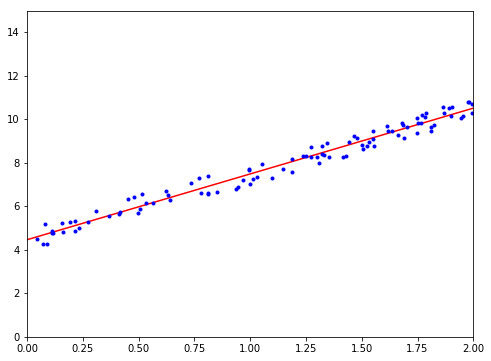

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent coded using Scikit-Learn looks like this:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.46286236]), array([[3.02692573]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.46286236],
       [10.51671383]])

### Gradient Descent

To implement Gradient Descent, we need to compute the gradient of the cost function with regards to each model parameter $ \theta_j $.

$ \frac {\partial} {\partial \theta_j} MSE(\theta) = \frac {2} {m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)}) {x_{i}}^{(i)} $

_Gradient vector of the cost function_

$ \nabla_{\theta}MSE(\theta) = \frac {2} {m} X^T \cdot (X \cdot \theta - y) $

This formula involves calculations over the full training set X, at each Gradient Descent step. 

_Gradient Descent step_

$ \theta^{(next step)} = \theta - \eta\nabla_\theta MSE(\theta) $

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

In [10]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[4.46286236],
       [3.02692573]])

### Stochastic Gradient Descent

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning shedule hyperparameters

def learning_shedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

In [13]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_shedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.46207198],
       [3.03196533]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.46093439]), array([3.02444067]))

### Mini-batch Gradient Descent

At each step, instead of computing the gradient based on the full training set or based on just one instance, Mini-batch GD computes the gradient on small random sets of instances called mini-batches.

### Polynomial Regression 

[-3, 3, 0, 10]

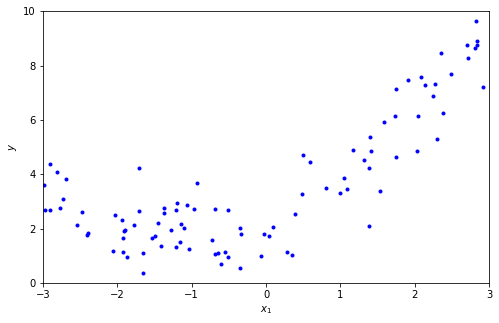

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(8, 5))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([-3, 3, 0, 10])

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.05060257])

In [19]:
X_poly[0]

array([-2.05060257,  4.20497088])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10208634]), array([[1.01302188, 0.49388258]]))

### Learning Curves 

These are plots of the model's perfomance on the training set and the validation set as a function of the training set size.

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

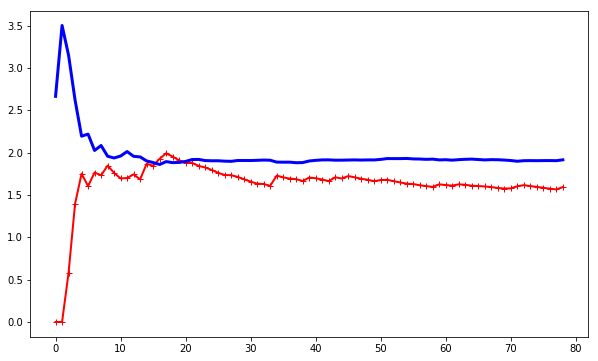

In [30]:
lin_reg = LinearRegression()
plt.figure(figsize=(10, 6))
plot_learning_curves(lin_reg, X, y)

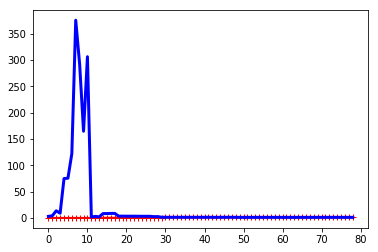

In [33]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Models

### Ridge Regression 

Also called Tikhonov regularization, is a regularized version of Linear Regression: a regularization term equal to $ \alpha \sum_{i=1}^n {\theta_i}^2 $ is added to the cost function. 

It is important to scale the data (e.g. using a StandardScaler) before perfoming Ridge Regression, as it is sensitive to the scale of the input features.

_Ridge Regression closed-form solution_

$ \theta = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y $

In [34]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.23846956]])

In [35]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.22782075])

### Lasso Regression 

_Least Absolute Shrinkage and Selection Operator Regression_ is another regilarized version of Linear Regression: jsut like Ridge Regression, it adds a regularization term to the cost function, but it uses the $ \ell_1 $ norm of the weight vector instad of half the square of the $ \ell_2 norm $

_Lasso Regression cost funciton_

$ J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n |\theta_i| $

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.19063797])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression.

$ J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n |\theta_i| + \frac{1 - r} {2} \alpha \sum_{i=1}^{n} {\theta_i}^2 $

It is almost preferable to have a little bit of regularization, so generally we should avoid plain Linear Regression. Ridge is a good default, but if we suspect that only a few features are actually useful, we should prefer Lasso or Elastic Net. 

In [37]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.18994023])

## Logistic Regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. 

### Estimating Probabilities

_Logistic Regression model estimated probability (vectorized form)_

$ p = h_{\theta}(x)= \sigma(\theta^T \cdot x) $

_Logistic function_

$ \sigma(t) = \frac {1} {1 + e^{-t}} $

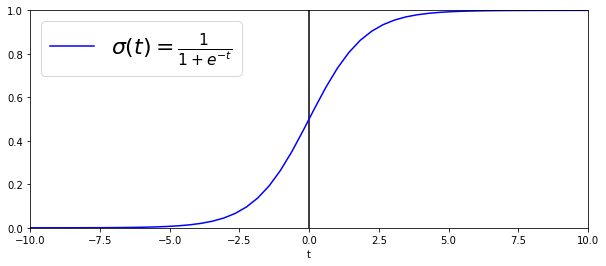

In [62]:
x = np.linspace(-10, 10)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 4))
plt.plot([0, 0], [-1, 1], 'k-')
plt.plot(x, y, 'b-', label=r'$\sigma(t) = \frac {1} {1 + e^{-t}}$')
plt.axis([-10, 10, 0, 1.0])
plt.xlabel('t')
plt.legend(fontsize=22)
plt.show()

_Cost function of a single training instanse_

$ c(\theta) = -log(p) : if y = 1, 
                  -log(1 - p) : if y = 0 $

### Decision Boundaries

In [63]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [64]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if iris-virginica, else 0

In [68]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

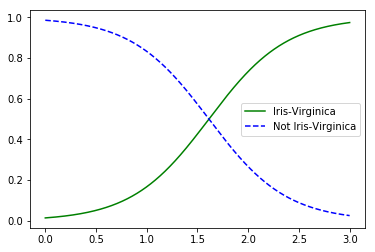

In [80]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend()

In [82]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

_Softmax score for classs k_

$ s_k(x) = {\theta _k}^T \cdot x $

In [83]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
softmax_reg.predict([[5, 2]])

array([2])